# Handling Imbalanced Dataset
1. Upsampling
2. Downsampling

In [2]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with 2 classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [4]:
n_class_0, n_class_1

(900, 100)

In [6]:
## CREATE MY DATAFRAME WITH IMBALANCED DATASET
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'target' : [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'target' : [1] * n_class_1
})

In [8]:
df = pd.concat([class_0, class_1]).reset_index(drop=True)

In [12]:
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [14]:
df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [16]:
## Upsampling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [20]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, replace=True, ## Sample with replacement
                                n_samples=len(df_majority),
                                random_state=42)

In [22]:
df_minority_upsampled.shape

(900, 3)

In [24]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [26]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [28]:
df_upsampled['target'].value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [30]:
## Downsampling
df_minority = df[df['target']==1]
df_majority = df[df['target']==0]

In [32]:
from sklearn.utils import resample
df_majority_downsampled = resample(df_majority, replace=False,
                                n_samples=len(df_minority),
                                random_state=42)

In [36]:
df_majority_downsampled.shape

(100, 3)

In [38]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [42]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

# SMOTE(Synthetic Minority Oversampling Technique)

In [47]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_redundant=0, n_features=2, n_clusters_per_class=1,
                   weights=[0.90], random_state=12)

In [49]:
import pandas as pd
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [51]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

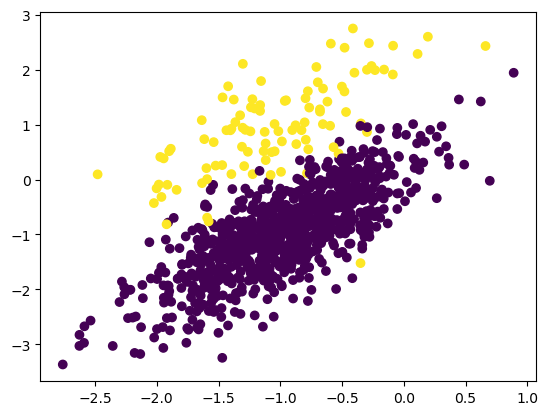

In [53]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [55]:
!pip install imblearn

   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/238.4 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 2.9 MB/s eta 0:00:00


In [57]:
from imblearn.over_sampling import SMOTE

In [59]:
## Transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [61]:
X.shape

(1800, 2)

In [63]:
y.shape

(1800,)

In [65]:
len(y[y==0])

900

In [67]:
len(y[y==1])

900

In [69]:
df1 = pd.DataFrame(X, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])
final_df = pd.concat([df1, df2], axis=1)

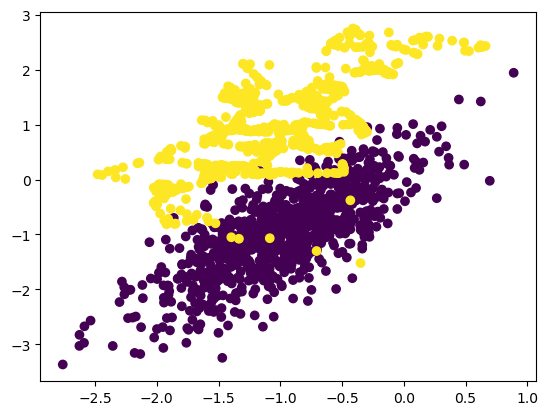

In [71]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])